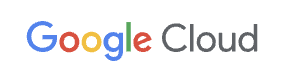 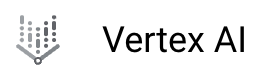

# **Demo 2/3**: Gemini API in Vertex AI (Enterprise-ready)



## Overview

🧡 There are two levels of API platforms for Gemini API:

- **Gemini API in Google AI for Developers**: Experiment, prototype, and deploy small projects.

- 👏 **Gemini API in Vertex AI**: Build enterprise-ready projects in Google Cloud Vertex AI

This notebook uses the [Gemini API in Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/start/quickstarts/quickstart-multimodal) to develop an enterprise-ready generative AI solution.

## Get started

### Install Google Cloud AI Platform SDK and other required packages

<font color="red">**What Changed:**</font>

SDK installation
- **Before**:

> `!pip install --upgrade google-generativeai`

- **After**:

> `!pip install --upgrade google-cloud-aiplatform`

In [ ]:
%%capture
# !pip install --upgrade google-generativeai
!pip install --upgrade google-cloud-aiplatform

!pip install PyPDF2

### Authentication

<font color="red">**What Changed:**</font>

Before:

> `genai.configure(api_key="API Key")`

After:

> - Authenticate Colab user to Google Cloud
> - Vertex AI init with Project ID and Region

[Not required in Colab Enterprise]

In [ ]:
# genai.configure(api_key="API Key")

from google.colab import auth


# Authenticate Colab user to Google Cloud
auth.authenticate_user()

# Define Google Cloud project information
PROJECT_ID = "[your-project-id]"  # @param {type:"string"}
LOCATION = "us-central1"  # @param {type:"string"}

# Initialize Vertex AI
import vertexai

vertexai.init(project=PROJECT_ID, location=LOCATION)

### Import libraries

<font color="red">**What Changed:**</font>

- Import statements

**Before**:

> `import google.generativeai as genai`

**After**:

> `import vertexai.generative_models as genai`


In [ ]:
# import google.generativeai as genai
import vertexai.generative_models as genai

import PyPDF2
import IPython
from IPython.display import display, Markdown, Latex
from rich import print as rich_print
from rich.markdown import Markdown as rich_Markdown

### Set up the models

<font color="red">**No Change**</font>

You can experiment with various supported Gemini models.

- `gemini-1.5-pro`: Optimized for complex reasoning tasks such as code and text generation, text editing, problem solving, data extraction and generation
- `gemini-1.5-flash`: Fast and versatile performance across a diverse variety of tasks

If you are not sure which model to use, then try `gemini-1.5-flash`. `gemini-1.5-flash` is optimized for multimodal use cases where speed and cost are important.



**[Vertex Gemini 1.5 Flash](https://cloud.google.com/vertex-ai/generative-ai/docs/learn/models#gemini-models)**


![](https://storage.googleapis.com/github-repo/io24/gemini-api-session/img/vertex_ai_model_1.png)

**[Vertex Gemini 1.5 Pro](https://cloud.google.com/vertex-ai/generative-ai/docs/learn/models#gemini-models)**


![](https://storage.googleapis.com/github-repo/io24/gemini-api-session/img/vertex_ai_model_2.png)

**[Vertex Gemini 1.5 Flash Version](https://cloud.google.com/vertex-ai/generative-ai/docs/learn/model-versions)**


![](https://storage.googleapis.com/github-repo/io24/gemini-api-session/img/vertex_ai_model_version_1.png)

**[Vertex Gemini 1.5 Pro Version](https://cloud.google.com/vertex-ai/generative-ai/docs/learn/model-versions)**


![](https://storage.googleapis.com/github-repo/io24/gemini-api-session/img/vertex_ai_model_version_2.png)

In [ ]:
from vertexai.generative_models import (
    GenerationConfig,
    HarmCategory,
    HarmBlockThreshold,
    Part
)


# Set model parameters
generation_config = GenerationConfig(
    temperature=1,
    max_output_tokens=8192,
)

# Set safety settings
safety_settings = {
    HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
    HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
    HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
    HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
}

# gemini-1.5-pro
model_pro = genai.GenerativeModel(model_name="gemini-1.5-pro",
                              generation_config=generation_config,
                              safety_settings=safety_settings)

#gemini-1.5-flsh
model_flash = genai.GenerativeModel(model_name="gemini-1.5-flash",
                              generation_config=generation_config,
                              safety_settings=safety_settings)

### 📄 Text (Extracted from PDF)

<font color="red">**No Change**</font>

In [ ]:
#@title Helper Functions
## Helper Function

import PyPDF2
import requests
from io import BytesIO

# The function reads the PDF directly from the URL and caches in the memory without persisting

def pdf_to_dict_str(url_or_file_path):
    """Reads a PDF from a local file path or URL and returns a dictionary of page text."""

    # Determine if it's a URL or file path
    if url_or_file_path.startswith('http'):
        # Fetch the PDF from the URL
        response = requests.get(url_or_file_path)
        response.raise_for_status()  # Raise an error if the request fails
        pdf_file = BytesIO(response.content)
    else:
        # Open the local file
        pdf_file = open(url_or_file_path, 'rb')

    # Process the PDF content (same as before)
    with pdf_file:
        pdf_reader = PyPDF2.PdfReader(pdf_file)
        num_pages = len(pdf_reader.pages)
        page_dict = {}
        for page_num in range(num_pages):
            page = pdf_reader.pages[page_num]
            page_text = page.extract_text()
            page_dict[page_num + 1] = page_text

        return str(page_dict)


#### Blog: Google Cloud demonstrates the world's largest distributed training job...

18 pages, including text, charts, images

In [ ]:
# read through each page and extracts the text and saves in the dictionary as {1:"context of page 1"}, 2:"context of page 2"}, .... }
pdf_context = pdf_to_dict_str("https://storage.googleapis.com/gemini-lavi-asset/idea_doc/stage_1_prototype_Google%20Cloud%20TPU%20blog.pdf")

In [ ]:
%%time

prompt_parts = [
  pdf_context,
  "What are key achievement for Google Cloud from the following blog. Mention in bullet.",
]

print(model_pro.count_tokens(prompt_parts))

response = model_pro.generate_content(prompt_parts)
print("\n Usage Metadata:\n",response.usage_metadata)
Markdown(response.text)

In [ ]:
%%time

response = model_flash.generate_content(prompt_parts)
Markdown(response.text)

### 🏞️ PDF

<font color="red">**What Changed:**</font>

- File Upload method

**Before**:

> `genai.upload_file`

**After**:

> `Part.from_uri [reading from GCS]`

#### QUARTERLY REPORT (15 pages)

In [ ]:

blog_pdf = Part.from_uri(uri = "gs://gemini-lavi-asset/idea_doc/stage_1_prototype_Google Cloud TPU blog.pdf",
                         mime_type="application/pdf")

In [ ]:
%%time

prompt_parts = [
  blog_pdf,
  "what is the emfu for bf16 and 128b parameter model with 1 tpu v5e pod? Cite the table and page number and explain the significance of the results",
]
response = model_flash.generate_content(prompt_parts)
print("\n Usage Metadata:\n",response.usage_metadata)
rich_Markdown(response.text)

### Audio File ◀︎ •၊၊||၊|။||||။‌‌‌‌‌၊|• 0:10

#### Alphabet 2023 Q4 Earnings Call (1 hour)

In [ ]:
audio_file_path = "https://storage.googleapis.com/gemini-lavi-asset/production/earning_calls/Alphabet%202023%20Q4%20Earnings%20Call.mp3"

IPython.display.Audio(audio_file_path)

<font color="red">**What Changed:**</font>

- File Upload method


**Before**:

> `genai.upload_file`

**After**:

> `Part.from_uri [reading from GCS]`


In [ ]:
from vertexai.generative_models import Part

In [ ]:
# earning_calls = genai.upload_file(path="/content/stage_1_prototype_Alphabet 2023 Q4 Earnings Call.mp3",
#                             display_name="earning_calls")

earning_calls = Part.from_uri(uri = "gs://gemini-lavi-asset/production/earning_calls/Alphabet 2023 Q4 Earnings Call.mp3",
                              mime_type="audio/mpeg")

In [ ]:
%%time

prompt_parts = [
  earning_calls,
  "what are major comments by Sundar and Ruth about AI and what key questions were asked by analyst and give their name? give answer in bullets ",
]

print(model_pro.count_tokens(prompt_parts))

response = model_pro.generate_content(prompt_parts)
print("\n Usage Metadata:\n",response.usage_metadata)
Markdown(response.text)

In [ ]:
%%time

response = model_flash.generate_content(prompt_parts)
Markdown(response.text)

### 🎬 Video

<font color="red">**What Changed:**</font>

- File Upload method

**Before**:

> `genai.upload_file`

**After**:

> `Part.from_uri [reading from GCS]`



In [ ]:
video_file_path = "/content/data/Idea/What's next for AI and Google Search _ Google I_O 2023.mp4"

IPython.display.Video(video_file_path, embed=True, width=450)

In [ ]:
video_file_path = "https://storage.googleapis.com/gemini-lavi-asset/idea_doc/What%39s%20next%20for%20AI%20and%20Google%20Search%20_%20Google%20I_O%202023.mp4"

IPython.display.Video(video_file_path, embed=True, width=450)

In [ ]:
# # Upload a video ~ 1min
# video_file_name = "/content/What's next for AI and Google Search _ Google I_O 2023.mp4"
# processed_files_search = process_video(video_file_name, full_video=True)

In [ ]:
video = Part.from_uri(uri = "gs://gemini-lavi-asset/idea_doc/What's next for AI and Google Search _ Google I_O 2023.mp4",
                      mime_type="video/mp4")

In [ ]:
%%time

prompt_parts = [
  video,
  "Describe this video and How is google using generative ai in search? Give response in bullet",
]

print(model_pro.count_tokens(prompt_parts))

response = model_pro.generate_content(prompt_parts)
print("\n Usage Metadata:\n",response.usage_metadata)
Markdown(response.text)

In [ ]:
%%time

response = model_flash.generate_content(prompt_parts)
Markdown(response.text)

## 🆕 Context Caching [Pre-GA] 👏👏👏👏

The Gemini API provides the context caching feature for developers to store frequently used input tokens in a dedicated cache and reference them for subsequent requests, eliminating the need to repeatedly pass the same set of tokens to a model. This feature can help reduce the number of tokens sent to the model, thereby lowering the cost of requests that contain repeat content with high input token counts.

- More details about the API: [Link](https://cloud.google.com/vertex-ai/generative-ai/docs/context-cache/context-cache-overview)
- Context Caching pricing: [Link](https://cloud.google.com/vertex-ai/generative-ai/pricing#context-caching)

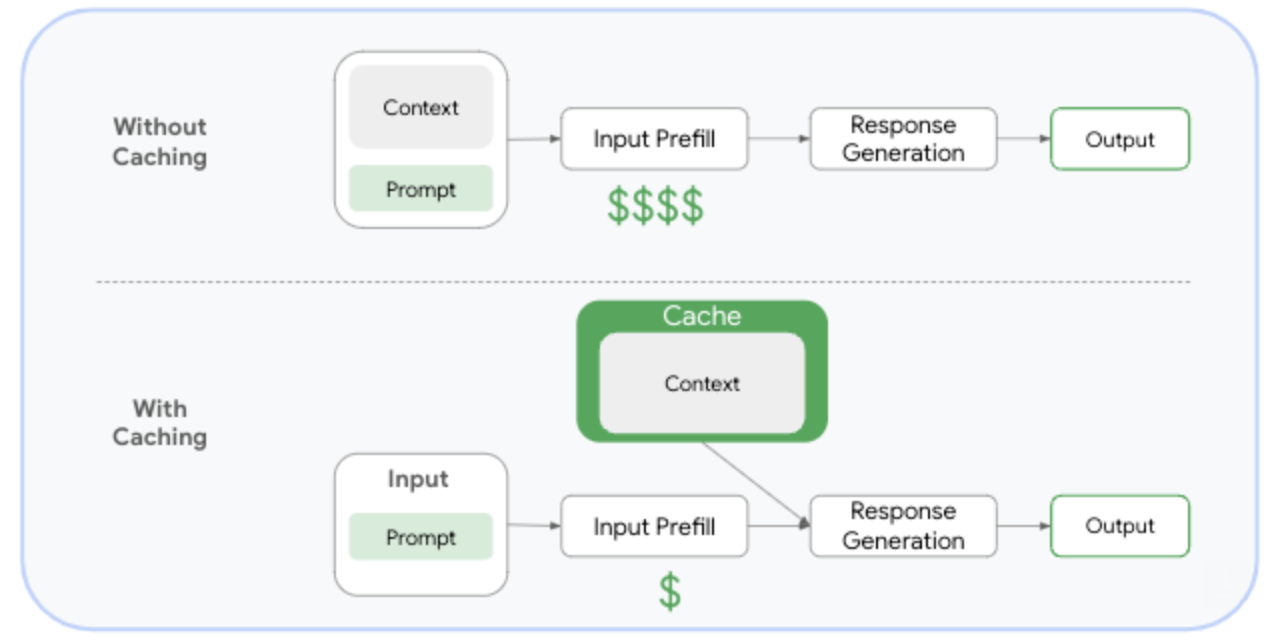

In [ ]:
%%time

from vertexai.preview import caching
import datetime
import time

# Create a cache with a 5 minute TTL
cache = caching.CachedContent.create(
    model_name='gemini-1.5-pro-001',
    system_instruction="""You are an expert researcher. You always stick to the facts in the sources provided, and never make up new facts.
Now look at this video, and answer the following questions.
""",
    contents=[Part.from_uri(uri = "gs://gemini-lavi-asset/idea_doc/Responsible AI _ Google I_O 2023.mp4",
    mime_type="video/mp4")
],
    # caching duration is called the time to live (TTL). If not set, the TTL defaults to 1 hour.
    # The cost for caching depends on the input token size and how long you want the tokens to persist.
    ttl=datetime.timedelta(minutes=5),
)

In [ ]:
print("Cache ID: ", cache.name)

In [ ]:
%%time

from vertexai.preview.generative_models import GenerativeModel


# Construct a GenerativeModel which uses the created cache.
cached_model =  GenerativeModel.from_cached_content(cached_content=cache)

# Query the model
response = cached_model.generate_content([("""How is Google thinking about responsible AI?.""")])

print(response.usage_metadata)
Markdown(response.text)

In [ ]:
# Query the model
response = cached_model.generate_content([("""Summarize key points in the video with the timestamps.""")])

print(response.usage_metadata)
Markdown(response.text)

Learn more:
- [get cache information](https://cloud.google.com/vertex-ai/generative-ai/docs/context-cache/context-cache-getinfo)
- [update the context](https://cloud.google.com/vertex-ai/generative-ai/docs/context-cache/context-cache-update)
- [delete the cache](https://cloud.google.com/vertex-ai/generative-ai/docs/context-cache/context-cache-delete)